# Importing Library

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib

Data Handling

In [6]:
#Read data from csv file
df=pd.read_csv(r"D:\1- Projects GitHub\7. House Price Prediction\House Price Prediction Dataset.csv")
#show missing value
print(f"missing value in data{df.isnull().sum()}")
#show duplicated value
print(f"Duplicated value ={df.duplicated().sum()}")
#show shape of data
print(f"shape = {df.shape}")

missing value in dataId           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64
Duplicated value =0
shape = (2000, 10)


In [7]:
#frist 5 row in data
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
#Delete column name ID
df.drop(columns=['Id'],inplace=True)

In [9]:
#Data Information to show category and numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [10]:
#To define Mean ,Max ,Min
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


# EDA

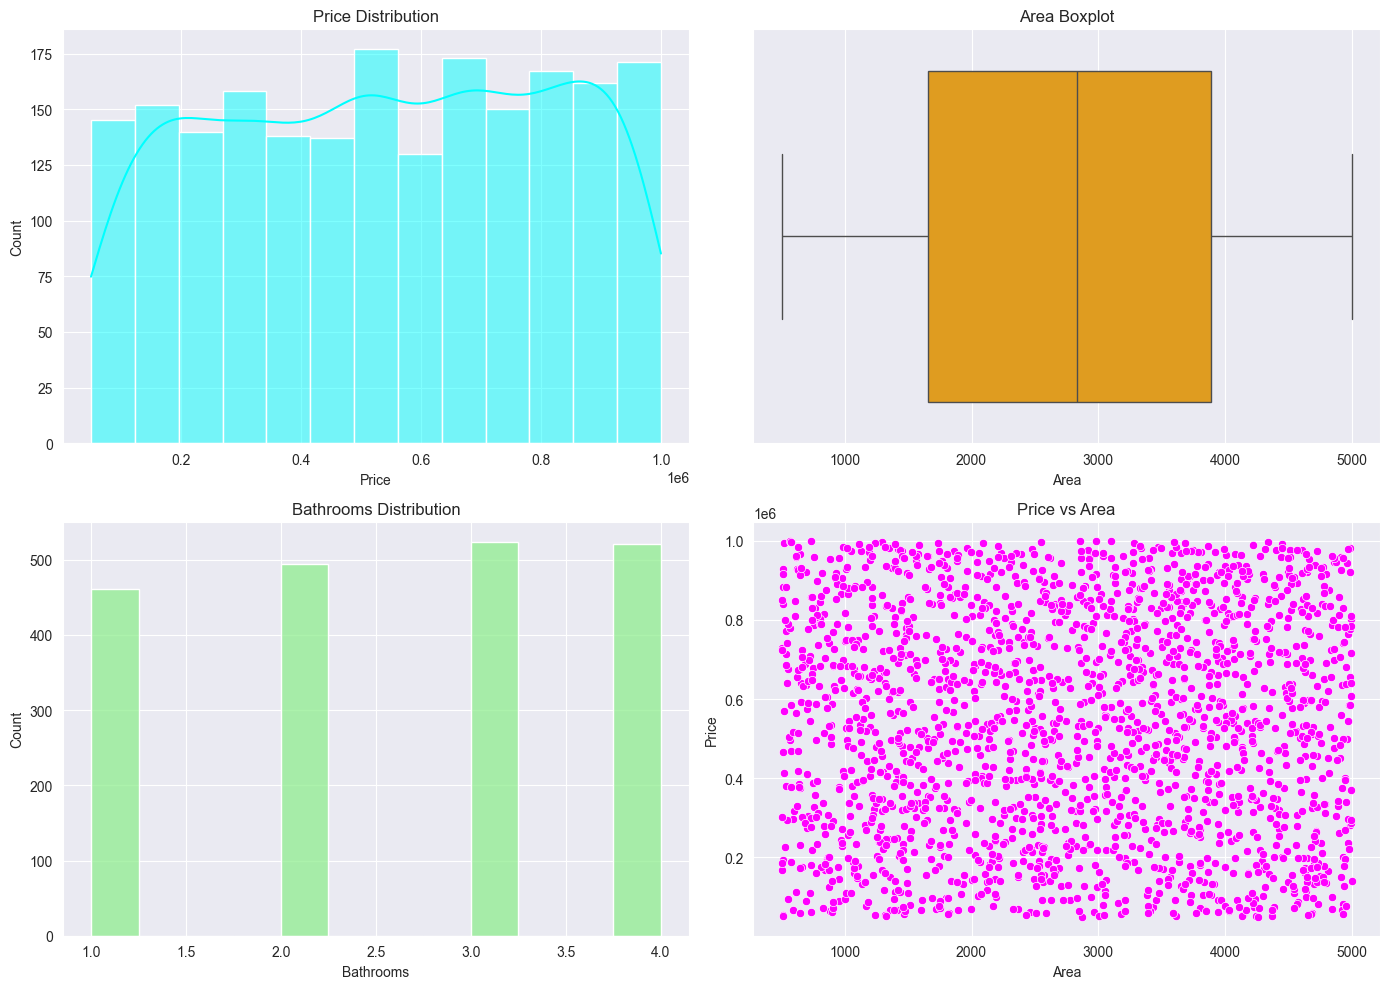

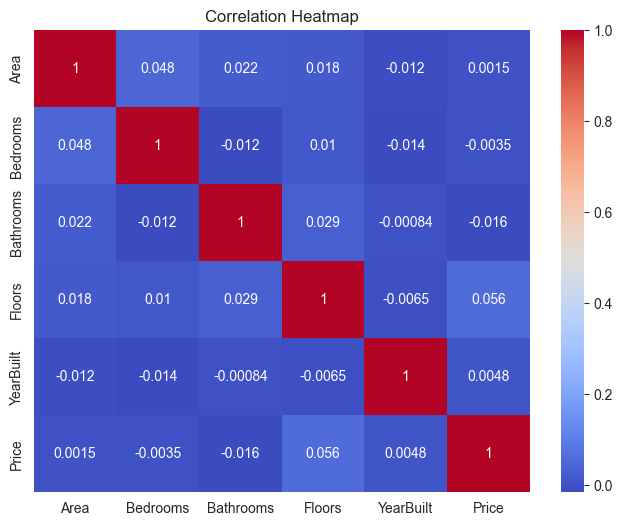

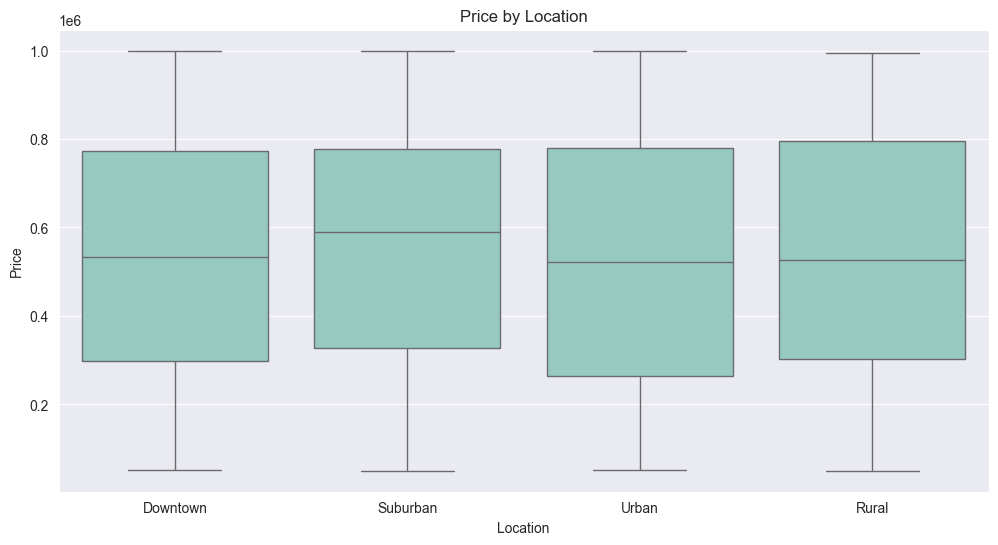

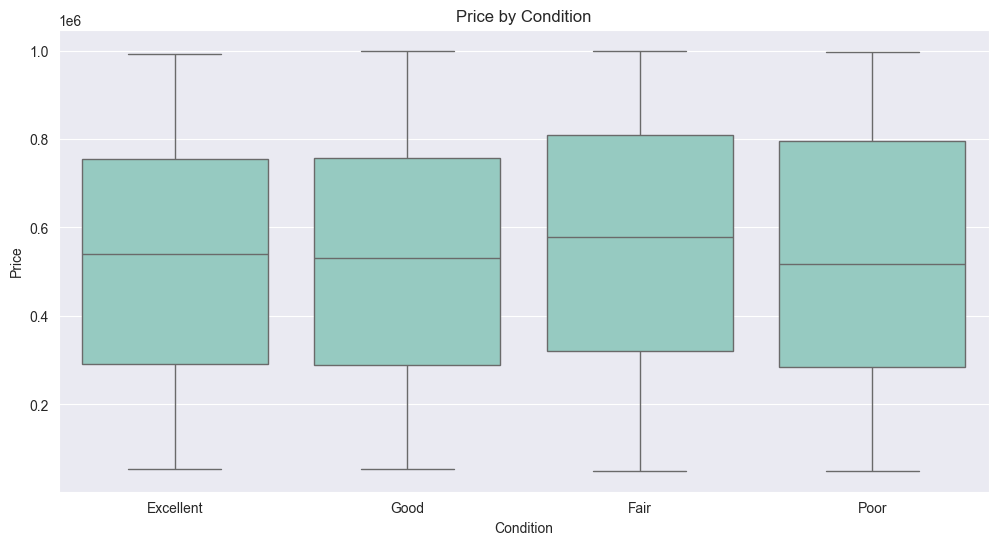

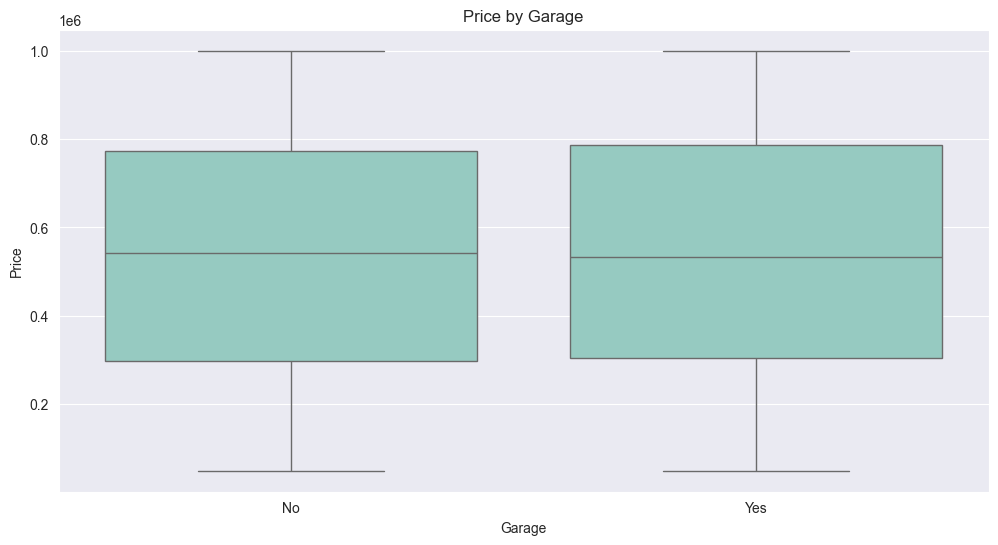

🔍 number of outliers: 0


In [11]:
plt.style.use('dark_background')
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
sns.histplot(df['Price'], kde=True, ax=axes[0, 0], color='cyan')
axes[0, 0].set_title('Price Distribution')

# Space distribution
sns.boxplot(x=df['Area'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Area Boxplot')

# Distribution of the number of bathrooms
sns.histplot(df['Bathrooms'], kde=False, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Bathrooms Distribution')

# The relationship of price to area
sns.scatterplot(x='Area', y='Price', data=df, ax=axes[1, 1], color='magenta')
axes[1, 1].set_title('Price vs Area')

plt.tight_layout()
plt.show()

# -----------------------------
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#The effect of qualitative variables on the price
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price by Location')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Price', data=df)
plt.title('Price by Condition')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Garage', y='Price', data=df)
plt.title('Price by Garage')
plt.show()

# Detect outliers
# -----------------------------
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print("🔍 number of outliers:", outliers.shape[0])

# Feature Engineering & ML Readiness

In [12]:
#1. Log transform of oblique features
df['Log_SalePrice'] = np.log1p(df['Price'])

#2. Create new features
df['TotalRooms'] = df['Bedrooms'] + df['Bathrooms']
df['HouseAge'] = 2025 - df['YearBuilt']
df['IsMultiFloor'] = (df['Floors'] > 1).astype(int)


#3. Normalize digital data
scaler = StandardScaler()
numeric_cols = ['Area', 'TotalRooms', 'HouseAge']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Log_SalePrice,TotalRooms,HouseAge,IsMultiFloor
0,-1.101471,5,4,3,1970,Downtown,Excellent,No,149919,11.917857,1.919307,-0.238155,1
1,1.147485,5,4,3,1958,Downtown,Excellent,No,424998,12.959842,1.919307,0.095942,1
2,0.622317,2,2,3,1938,Downtown,Good,No,266746,12.494056,-0.867143,0.652770,1
3,-1.405759,4,2,2,1902,Suburban,Fair,Yes,244020,12.405010,0.247437,1.655061,1
4,1.652574,1,4,2,1975,Downtown,Fair,Yes,636056,13.363043,-0.309853,-0.377363,1


In [13]:
features = df.drop(columns=['Price', 'Log_SalePrice'])
target = df['Log_SalePrice']
for col in features.columns:
    if features[col].isnull().sum() > 0:
        median_val = features[col].median()
        features[col].fillna(median_val, inplace=True)

In [14]:
# 🏷️ 1. Encode 'Garage' using LabelEncoder (Yes/No → 1/0)
le_garage = LabelEncoder()
df['Garage'] = le_garage.fit_transform(df['Garage'])

# 🏷️ 2. Encode 'Condition' using Ordinal Encoding
condition_order = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Condition'] = df['Condition'].map(condition_order)

# 🏷️ 3. One-Hot Encode 'Location'
df = pd.get_dummies(df, columns=['Location'], drop_first=True)  # drop_first to avoid multicollinearity

# ✅ check before splite data to train and test
print(df.head())

       Area  Bedrooms  ...  Location_Suburban  Location_Urban
0 -1.101471         5  ...              False           False
1  1.147485         5  ...              False           False
2  0.622317         2  ...              False           False
3 -1.405759         4  ...               True           False
4  1.652574         1  ...              False           False

[5 rows x 15 columns]


In [15]:
df[['Location_Rural', 'Location_Suburban', 'Location_Urban']] = df[['Location_Rural', 'Location_Suburban', 'Location_Urban']].astype(int)

In [16]:
condition_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Condition'] = df['Condition'].map(condition_map)

In [17]:
garage_map = {'No': 0, 'Yes': 1}
df['Garage'] = df['Garage'].map(garage_map)

In [18]:
print(df.dtypes)

Area                 float64
Bedrooms               int64
Bathrooms              int64
Floors                 int64
YearBuilt              int64
Condition            float64
Garage               float64
Price                  int64
Log_SalePrice        float64
TotalRooms           float64
HouseAge             float64
IsMultiFloor           int64
Location_Rural         int64
Location_Suburban      int64
Location_Urban         int64
dtype: object


# Model Training & Evalution Summary

In [19]:
target = 'Log_SalePrice'
X_train, X_test, y_train, y_test = train_test_split(
    features, df[target],
    test_size=0.2,
    random_state=42
)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
    "LightGBM": LGBMRegressor(random_state=42)
}

results = {}

In [24]:
X_train

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,TotalRooms,HouseAge,IsMultiFloor
968,1.310442,4,4,3,1933,Urban,Excellent,No,1.362017,0.791977,1
240,-1.331618,3,3,1,1970,Downtown,Good,No,0.247437,-0.238155,0
819,-1.053588,3,4,1,1993,Urban,Good,Yes,0.804727,-0.878508,0
692,-0.099017,2,3,1,1972,Rural,Poor,Yes,-0.309853,-0.293838,0
420,0.385991,2,4,1,1981,Rural,Excellent,Yes,0.247437,-0.544411,0
...,...,...,...,...,...,...,...,...,...,...,...
1130,0.538136,5,3,3,1931,Downtown,Good,Yes,1.362017,0.847660,1
1294,-0.802588,3,3,2,1941,Downtown,Fair,Yes,0.247437,0.569246,1
860,-1.005705,2,3,3,1973,Downtown,Good,No,-0.309853,-0.321680,1
1459,0.517283,5,4,1,1955,Downtown,Good,Yes,1.919307,0.179466,0


In [25]:
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
   
#     r2 = r2_score(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
    
#     results[name] = {
#         "model": model,
#         "RMSE": rmse,
#         "MAE": mae
#     }
#     print(f"Model: {name}")
#     print(f" R² Score: {r2:.4f}")
#     print(f" RMSE: {rmse:.4f}")
#     print(f" MAE: {mae:.4f}")
#     print("-" * 30)

In [26]:
#best_model_name = max(results, key=lambda x: (results[x]["R2"], -results[x]["RMSE"]))
#best_model = results[best_model_name]["model"]

#print(f"\n🏆 Best performing model: {best_model_name}")